## Simple Linear Regression 
- We are applying Simple Linear Regression on our dataset.
- It is Simple Linear Regression because we have only ONE Input Feature = Weight
- We also have only ONE Output feature = Height 
- We will be using two different algorithms to implement Linear Regression in the example:-
    1) Gradient Descent
    2) OLS    

### Steps to Implement Linear Regression - Gradient Descent ###
**Step - 1) Find the relationship between input features and output features using:-**
- Scatter Plot
- Pair Plot
- Corelation - df.corr()

**Step - 2) Feature Engineering / EDA**
    - Clean data for nulls, etc
    - Converting Classification data into numbers using encoding etc.
    - This step not done here since we have a custom dataset which does not have any nulls and the data is numeric

**Step - 3) Split data into Train and Test Data**
<code class="language-python">
    <pre>
        sklearn.model_selection.tran_test_split()
    </pre>
</code>

**Step - 4) Standardization of data using Z-Score**
- $\mu$ = mean
- $\sigma$ = standard deviation
- Xi = Input data values
- Z-Score = (Xi - $\mu$) / $sigma$

- Use sklearn.preprocessing.StandardScalar().transform() and fit_transform()
    - <b>For Training data use fit_transform()</b>
    - X_train = scalar.fit_transform(X_train)
    - This will train data and convert the 'training' data such that $\mu$ = 0 and $\sigma$ = 1
    
    <br/>

    - <b>For Test data use transform()</b>
    - X_test = scalar.transform(X_test)
    - Never use 'fit_transform' on training data

    <code>
        <pre>
            from sklearn.preprocessing import StandardScaler
            scalar = StandardScaler()
            X_train = scalar.fit_transform(X_train)
            X_test = scalar.transform(X_test)
        </pre>
    </code>


**Step - 5) Apply Machine Learning Algorithm - Linear Regression**
<code class="language-python">
    <pre>
    linearRegression = LinearRegression()
    linearRegression.fit(X_train,Y_train)
    </pre>
</code>

**Step -6) Plot the Best Fit Line based on Training Data**
<code class="language-python">
    <pre>
plt.scatter(X_train,Y_train) # Scatter Plot
plt.plot(X_train, linearRegression.predict(X_train), color='red')
</pre>
</code>

**Step 7) Make Predictions for Test Data**
<code class="language-python">
    <pre>
Y_pred = linearRegression.predict(X_test)
df_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
    </pre>
</code>

**Step 8) Find out the errors using MSE, MAE and RMSE**
<code class="language-python">
    <pre>
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
    </pre>
</code>

**Step 9) Performance Metrics using 'R squared'  and 'Adjusted R squared'**
<code class="language-python">
    <pre>
** r2 performance metrics**
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)

** Adjusted r2 performance metrics**
adjusted_r2 = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
    </pre>
</code>

**Step 10) Prediction for new data point**
<code class="language-python">
    <pre>
X_new = 150; # New weight
X_new_standardized = scalar.transform([[X_new]])
y_new = linearRegression.predict(X_new_standardized) 
    </pre>
</code>

## Linear Regression using OLS ##
<code class="language-python">
    <pre>
import statsmodels.api as sm    
ols_model = sm.OLS(Y_train, X_train).fit()
ols_predictions = ols_model.predict(X_test)
    </pre>
</code>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #For visualization
import numpy as np

#Display visuzaliation graphs inline (not in a seperate window)
%matplotlib inline

# Read the dataset
df=pd.read_csv('./resources/height-weight.csv')



***1) Linear Regression using Gradient Descent***

Text(0, 0.5, 'Height')

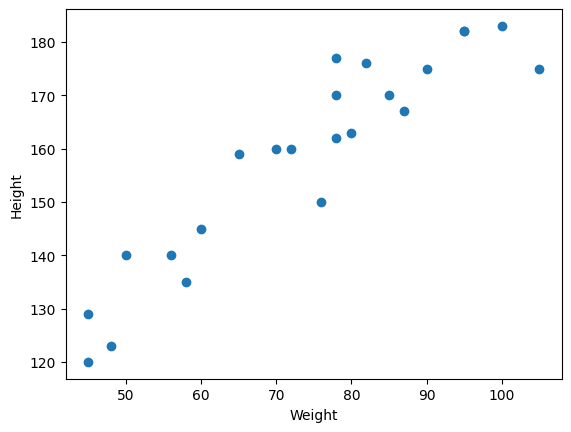

In [ ]:

#-------------- Step 1 - Find the relationship between Input and Output features -------------------
# Use Scatter Plot
# OUTPUT = Looking at the scatter plot we can observer that we have a Linear Relationship between Height and Weight
# - As the weight increases, height also increases
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
# Find the CO-RELATION between Input and Output
# Observations of Output
# - Between Weight to Weight and Height to Height the correlation will always be 1, as they are the same variables
# - The corelation between Weight to Height is 0.93 which means it is HIGHLY POSITIVELY CO-RELATED
# - df.corr() is using PEARSON'S corelation
corr = df.corr();
print(corr)

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


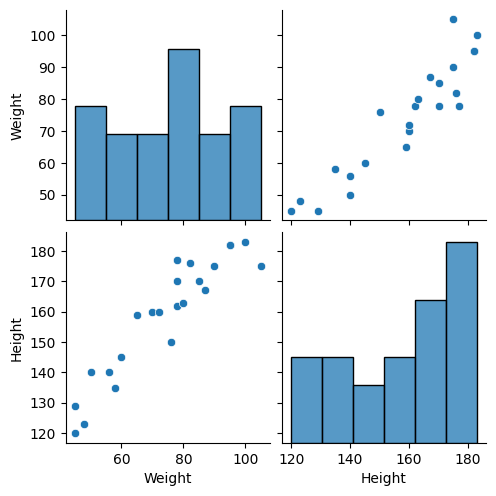

In [ ]:
# See the same Corelation using Pair Plot
# Output Observation 
# - Height and Weight are Linearly co-related
import seaborn as sns
sns.pairplot(df)

-------------- Step 2 - Feature Engineering and EDA -------------------
- Cleanup data for nulls
- Convert classification data into numerical data using encoding techniques
- In this example, since our data is created by us - there aren't any nulls or classification data - This step is SKIPPED

In [ ]:

# ----- Independent/Input and Dependent/Output Features -----
# X = Independent / Input Feature
# Y = Dependent / Output Feature

# ------ Indpendent/Input Feature = X --------
# IMPORTANT - Independent feature should be a Dataframe or 2D  Array
# Output Observation 
# - x.values.shape is only 1-D Array when we select a Series
X=df['Weight']
print('X type should be series ',type(X)) # This is a Series
print(X.values.shape)

# Always make sure that your Independent Feature is always in the form of either (1) DataFrame or (2) 2-D Array
# Output Observation
# - x.values.shape is 2-D Array when we select a DataFrame
X = df[['Weight']]
print('X type should be dataframe ',type(X))
print(X.values.shape)

# -------- Dependent/Output Feature = Y -------
# IMPORTANT - Dependent feature can be a Series or DataFrame OR 1D Array
Y = df['Height']
Y # Display Y

X type should be series  <class 'pandas.core.series.Series'>
(23,)
X type should be dataframe  <class 'pandas.core.frame.DataFrame'>
(23, 1)


0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [ ]:
## --------------- Step 3 - Split dataset into Train and Test datasets ----------------
# Train data will be used to train the model
# Test data will be used to test the model

# X_train = Input features for training data = 75% of Weight data
# X_test = Input features for testing data = 25% of Weight data
# Y_train = Output/target for training data = 75% of Height data
# Y_test = Output/target for testing data = 25% of Height data

# test_size = 0.25 means 25% data will be used for testing and remaining 75% data will be used for training
# random_state = 42 is used to ensure reproducibility of results
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)






In [ ]:
# Double check the split data
# Find metadata - more information on the python function train_test_split()
# train_test_split??

print('X_train.shape = ',X_train.shape)
print('Y_train.shape = ',Y_train.shape)
print('X_test.shape = ',X_test.shape)
print('Y_test.shape = ',Y_test.shape)

# X_train
# Y_train
# X_test
# Y_test

X_train.shape =  (17, 1)
Y_train.shape =  (17,)
X_test.shape =  (6, 1)
Y_test.shape =  (6,)


In [ ]:
# Step 4 ---------------- Standardization of Data ----------------
# Height is calculated in cms and Weight is calculated in kgs, so we need to standardize the data

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# fit_transform() - fit() + transform() = train data and convert it such that mean =0 and standard deviation =1
X_train = scalar.fit_transform(X_train)

# transform() - Here the 'mean' and 'standard-deviation' of 'training data' is used to transform the data in X_test
# - If we use 'fit_transform()' - Then the test data will be trained according to test data and we dont want that - we want our training and test data to be totally seperate.
X_test = scalar.transform(X_test)


In [ ]:
# Step 5 --------------- Apply ML Algorithm - Linear Regression ----------------
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train,Y_train) # Fit the model on training data (training data = X_train and Y_train )          

# Outputs - Coefficient/Slope and Intercept
# Slope m = 1.046
# This means that ONE movement in X will cause 1.046 movement in Y
print('Coefficient/Slope (m) = ',linearRegression.coef_)

# Intercept c - At what point the line crosses the Y axis.
print('Intercept (c) = ',linearRegression.intercept_)


Coefficient/Slope (m) =  [17.2982057]
Intercept (c) =  156.47058823529412


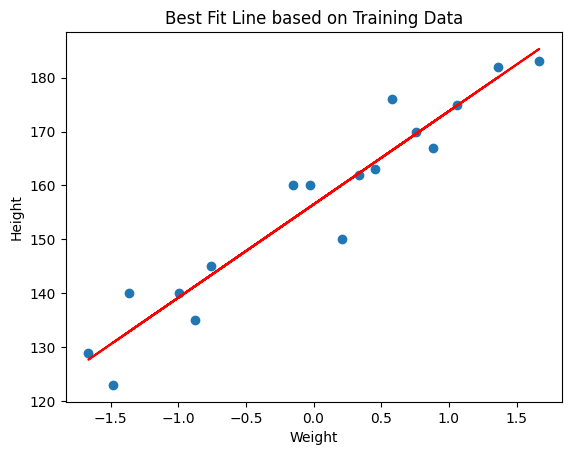

In [ ]:
# Step 6 --------------- Plot the Best Fit Line based on Training Data----------------
# Best Fit Line Equation - Y = mX + c
# Where m = Coefficient/Slope and c = Intercept 
plt.scatter(X_train,Y_train) # Scatter Plot

# This Best Fit Line will have a Coefficient/Slope(m) = 1.046 and Intercept(C) = 80.52 - FROM Step (5)
plt.plot(X_train, linearRegression.predict(X_train), color='red') # Best Fit Line
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Best Fit Line based on Training Data')
plt.show()

In [ ]:
# Step 7 ----------------- Make Predictions for Test Data --------------------
# Using the trained model on 'X_train' use the test data 'X_test' to make predictions and get 'Y_pred'
Y_pred = linearRegression.predict(X_test)
Y_pred # Display Predicted values

# Compare Actual vs Predicted
df_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_compare.head(10) # Display first 10 rows





,Actual,Predicted
15,177,162.264997
9,170,162.264997
0,120,127.683471
8,182,180.079723
17,159,148.641972
12,175,190.558973


In [ ]:
# Step 8 ------------------ Find out the errors using MSE, MAE and RMSE -------------------
from sklearn import metrics

# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error (MAE) = ',mae)

# Mean Squared Error
mse = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error (MSE) = ',mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) = ',rmse)

Mean Absolute Error (MAE) =  9.66512588679501
Mean Squared Error (MSE) =  114.84069295228699
Root Mean Squared Error (RMSE) =  10.716374991212605


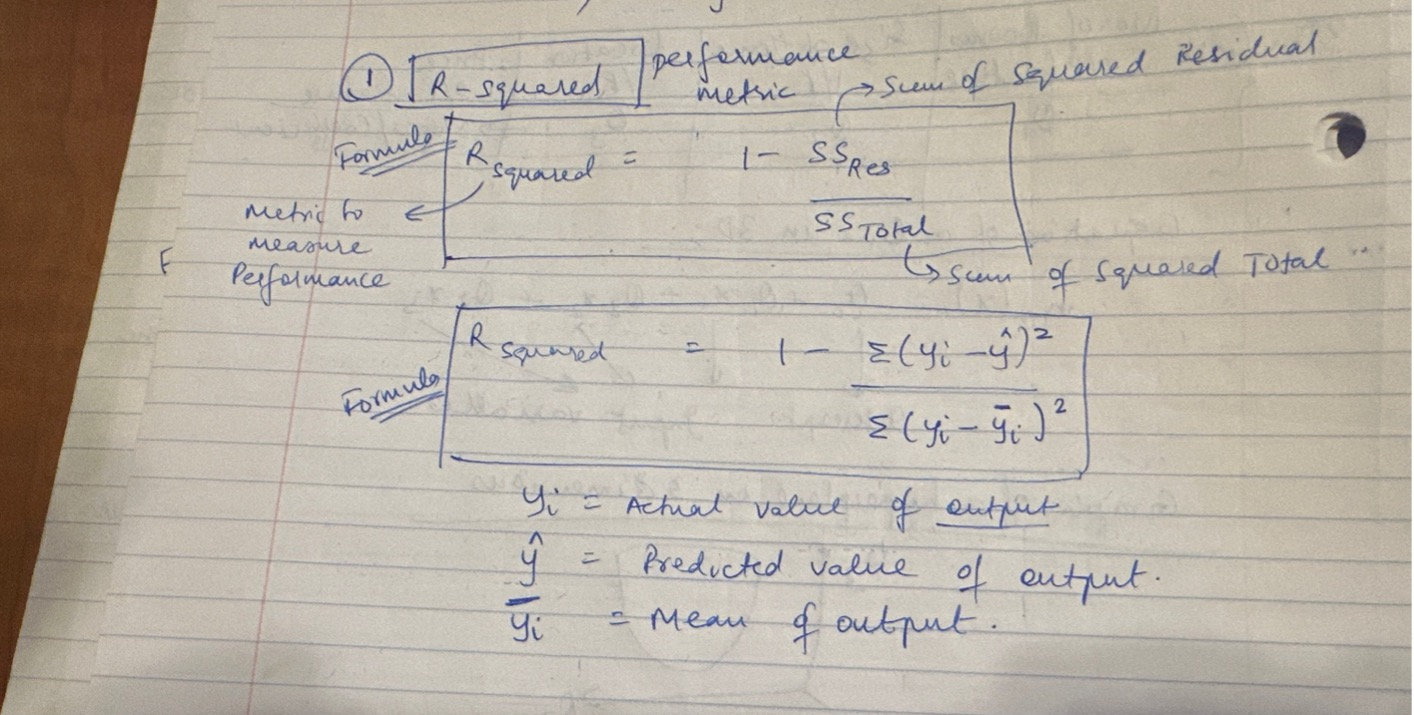

In [ ]:
from IPython.display import Image
Image(filename='resources/r_square.jpg',height=500,width=800)


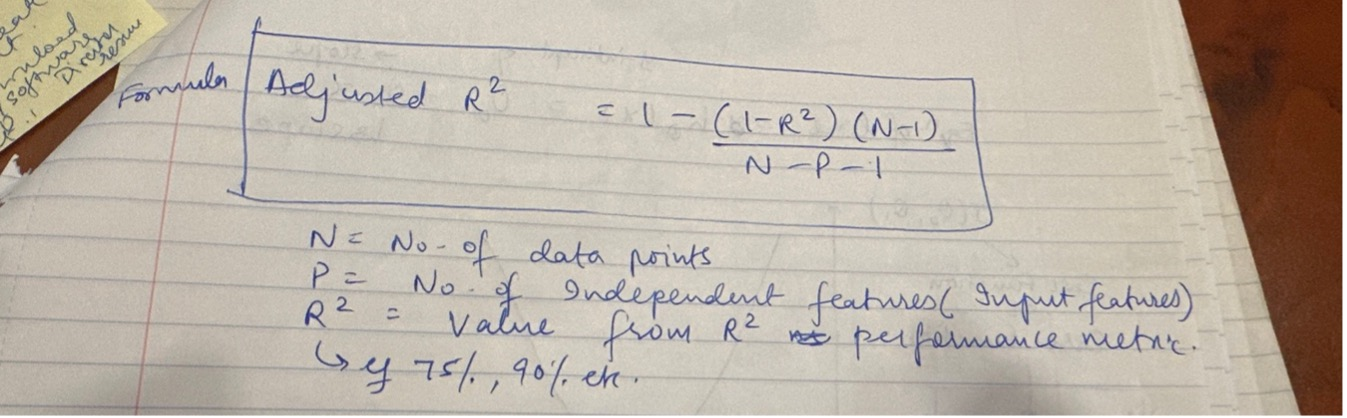

In [ ]:
from IPython.display import Image
Image(filename='resources/adjusted_r_square.jpg',height=500,width=800)

In [ ]:
# Step 9 --------------- Performance Metrics using 'R squared'  and 'Adjusted R squared' ------------------- 

# R2 score = 0.73 ~ 73% accuracy
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("R squared performance = ", r2)

# Adjusted R squared  = 0.67 ~ 67% accuracy  
# Adjusted R² = 1 - (1-R²)(n-1)/(n-p-1)
# Where,
# R² = R squared
# n = number of observations (data points)
# p = number of independent variables (features)
# Output Observation
adjusted_r2 = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R squared performance = ", adjusted_r2)   


R squared performance =  0.7360826717981276
Adjusted R squared performance =  0.6701033397476595


In [ ]:
# Step 10 --------- Prediction for new data point ------------------
# Standardize data (as in Step 4) for the new data point
X_new = 150; # New weight
X_new_standardized = scalar.transform([[X_new]])

# Predict the height for new data point (weight = 150 kgs)
y_new = linearRegression.predict(X_new_standardized)  # Height = Predict height for weight = 150 kgs 
print("Predicted height for weight 150 kgs is ", y_new)


Predicted height for weight 150 kgs is  [237.71559913]


/Users/ankur/backup/delta/sn/datascience/workspace/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***2) Linear Regression using OLS***

In [ ]:
# Linear Regression using OLS (Ordinary Least Squares) method
import statsmodels.api as sm    
ols_model = sm.OLS(Y_train, X_train).fit()
ols_predictions = ols_model.predict(X_test)
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):                    2.80e-16
Time:                        16:24:23   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------